In [2]:




###Problem statement :-Predict the Building Permission Category
##Import basic packages
import pandas as pd
import numpy as np

In [5]:
#Read files to check the contents
train = pd.read_csv("D:/Certi/Intvw/zs/4dbe6a1eb80f11e8/dataset/train_file.csv")
print(train.head())
test = pd.read_csv("D:/Certi/Intvw/zs/4dbe6a1eb80f11e8/dataset/test_file.csv")
print(test.head())

   Application/Permit Number   Permit Type               Address  \
0                    6640280  Construction       1924 10TH AVE E   
1                    6452959  Construction  9434 DELRIDGE WAY SW   
2                    6435127  Construction       535 TERRY AVE N   
3                    6620870    Demolition         830 4TH AVE S   
4                    6363778  Construction       805 NE 106TH ST   

                                         Description Action Type  \
0  Alterations to single family residence, (porti...     ADD/ALT   
1  Change use permit from restaurant to residenti...     ADD/ALT   
2  Construct interior alterations to existing off...     ADD/ALT   
3  need to remove a fire escape that is not part ...  DEMOLITION   
4  Channel modification to Thornton Creek, stream...     ADD/ALT   

        Work Type      Applicant Name     Application Date  \
0  No plan review        ZHANG, JERRY  2018-01-16T00:00:00   
1     Plan Review       MARTIN, TERRY  2015-02-13T00:00:00

In [6]:
print(train.shape, test.shape)

(33539, 19) (22360, 18)


In [7]:
##Check the data frame columns
print(train.columns)

Index(['Application/Permit Number', 'Permit Type', 'Address', 'Description',
       'Action Type', 'Work Type', 'Applicant Name', 'Application Date',
       'Issue Date', 'Final Date', 'Expiration Date', 'Status', 'Contractor',
       'Permit and Complaint Status URL', 'Master Use Permit', 'Latitude',
       'Longitude', 'Location', 'Category'],
      dtype='object')


In [8]:
##check the characteristics of Data quality
train.apply(lambda x: sum(x.isnull()))

Application/Permit Number              0
Permit Type                            0
Address                               19
Description                           10
Action Type                          779
Work Type                              0
Applicant Name                       135
Application Date                    6939
Issue Date                         10624
Final Date                         17851
Expiration Date                    10569
Status                              1574
Contractor                         27503
Permit and Complaint Status URL        0
Master Use Permit                  29041
Latitude                              21
Longitude                             21
Location                               8
Category                               0
dtype: int64

In [9]:
##observations
##lots of missing values
##Missing attributes
'''
Address                               19
Description                           10
Action Type                          779
Applicant Name                       135
Application Date                    6939
Issue Date                         10624
Final Date                         17851
Expiration Date                    10569
Status                              1574
Contractor                         27503
Master Use Permit                  29041
Latitude                              21
Longitude                             21
Location                               8
'''


'\nAddress                               19\nDescription                           10\nAction Type                          779\nApplicant Name                       135\nApplication Date                    6939\nIssue Date                         10624\nFinal Date                         17851\nExpiration Date                    10569\nStatus                              1574\nContractor                         27503\nMaster Use Permit                  29041\nLatitude                              21\nLongitude                             21\nLocation                               8\n'

In [10]:
train.describe()

,Application/Permit Number,Master Use Permit,Latitude,Longitude
count,3.353900e+04,4.498000e+03,33518.000000,33518.000000
mean,6.464032e+06,3.018357e+06,47.625743,-122.334745
std,1.337487e+05,6.354964e+03,0.053839,0.036986
min,6.061738e+06,3.001776e+06,47.495860,-122.430368
25%,6.391959e+06,3.014586e+06,47.587431,-122.362746
50%,6.478519e+06,3.017859e+06,47.625653,-122.333894
75%,6.569116e+06,3.023228e+06,47.669658,-122.306386
max,6.658995e+06,3.031743e+06,47.733970,-122.236509


In [11]:
train['Description'].nunique()

29380

In [12]:
##Description is combination of words

In [13]:
train['Permit Type'].nunique()


3

In [21]:
##Permit  Type is categorical as it has 3 types
train['Permit Type'].unique()

array(['Construction', 'Demolition', 'Site Development'], dtype=object)

In [15]:
train['Address'].nunique()

23217

In [16]:
##Address is of different types and combination of words

In [19]:
train['Action Type'].nunique()

16

In [20]:
##Action Type is categorical as it has fixed type of 16
train['Action Type'].unique()

array(['ADD/ALT', 'DEMOLITION', 'ALTER', 'NEW',
       'TREE/VEGETATION MAINT/RESTORE', 'NO CONSTRUCTION', nan, 'TEMP',
       'CURB CUT', 'GRADING', 'SHORELINE EXEMPTION ONLY',
       'SITE MONITORING ONLY', 'DECONSTRUCTION', 'RELOCATION',
       'FLOODPLAIN LICENSE ONLY', 'TREE PROTECTION EXEMPTION',
       'DRAINAGE APPROVAL'], dtype=object)

In [22]:
train['Work Type'].nunique()

2

In [24]:
##work Type is Categorical  with 2 types
train['Work Type'].unique()

array(['No plan review', 'Plan Review'], dtype=object)

In [25]:
##Applicant Name can be dropped as of no significance


In [26]:
train['Application Date'].nunique()

2273

In [27]:
##Application Date needs to be transformed to some other variable for usage

In [28]:
train['Issue Date'].nunique()

1409

In [29]:
##Issue date can be transformed to some other variable for usage

In [30]:
train['Final Date'].nunique()

1249

In [31]:
train['Expiration Date'].nunique()

1610

In [32]:
train['Status'].nunique()

12

In [33]:
##unique no of Status is 12 .
train['Status'].unique()

array(['Permit Issued', 'Permit Closed', 'Initial Information Collected',
       'Permit Finaled', 'AP Closed', 'CANCELLED', 'Application Accepted',
       nan, 'Reviews Completed', 'Information Collected',
       'Cert of Occupancy Authorized', 'AP Finaled', 'Inspections Added'],
      dtype=object)

In [34]:
train['Contractor'].nunique()

1743

In [35]:
train['Category'].unique()

array(['SINGLE FAMILY / DUPLEX', 'COMMERCIAL', 'INSTITUTIONAL',
       'MULTIFAMILY', 'INDUSTRIAL'], dtype=object)

In [36]:
##So we have 5 classes in prediction

In [37]:
##Final Observations from Exploratory data analysis
##Loads of Missing values which needs to be cleaned to proceed
## The varaibles Permit Type, Action Type,Work Type, status needs to be converted to Categorical
##Some of the variables are not required as the Latitude and Longitude alreaday given so fields like Address,Location might not be needed as they attribute to same thing

In [38]:
##There are lot of Missing values with dates 
'''
Application Date                    6939
Issue Date                         10624
Final Date                         17851
Expiration Date                    10569
'''


'\nApplication Date                    6939\nIssue Date                         10624\nFinal Date                         17851\nExpiration Date                    10569\n'

In [174]:
train_temp = train.copy()

In [175]:
train_temp.head()

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location,Category
0,6640280,Construction,1924 10TH AVE E,"Alterations to single family residence, (porti...",ADD/ALT,No plan review,"ZHANG, JERRY",2018-01-16T00:00:00,2018-01-16T00:00:00,NaN,2019-07-16T00:00:00,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.636732,-122.319828,"{'latitude': '47.63673222', 'human_address': '...",SINGLE FAMILY / DUPLEX
1,6452959,Construction,9434 DELRIDGE WAY SW,Change use permit from restaurant to residenti...,ADD/ALT,Plan Review,"MARTIN, TERRY",2015-02-13T00:00:00,2015-04-16T00:00:00,2016-11-15T00:00:00,2016-10-16T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.518298,-122.355555,"{'latitude': '47.51829831', 'human_address': '...",COMMERCIAL
2,6435127,Construction,535 TERRY AVE N,Construct interior alterations to existing off...,ADD/ALT,No plan review,"ALLEXSAHT, REBECCA",2014-09-04T00:00:00,2014-09-04T00:00:00,2015-11-20T00:00:00,2016-03-04T00:00:00,Permit Closed,IA/INTERIOR ARCHITECTS,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.624025,-122.337567,"{'latitude': '47.62402492', 'human_address': '...",COMMERCIAL
3,6620870,Demolition,830 4TH AVE S,need to remove a fire escape that is not part ...,DEMOLITION,Plan Review,"JUNK, FRANK",NaN,NaN,NaN,NaN,Initial Information Collected,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.595020,-122.328530,"{'latitude': '47.59502036', 'human_address': '...",COMMERCIAL
4,6363778,Construction,805 NE 106TH ST,"Channel modification to Thornton Creek, stream...",ADD/ALT,Plan Review,"DANIEL, MARK",2013-05-02T00:00:00,2013-12-19T00:00:00,2015-05-14T00:00:00,2015-06-19T00:00:00,Permit Closed,SEATTLE PARKS DEPT,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.705686,-122.320134,"{'latitude': '47.70568601', 'human_address': '...",COMMERCIAL


In [176]:
train_temp.dtypes


Application/Permit Number            int64
Permit Type                         object
Address                             object
Description                         object
Action Type                         object
Work Type                           object
Applicant Name                      object
Application Date                    object
Issue Date                          object
Final Date                          object
Expiration Date                     object
Status                              object
Contractor                          object
Permit and Complaint Status URL     object
Master Use Permit                  float64
Latitude                           float64
Longitude                          float64
Location                            object
Category                            object
dtype: object

In [177]:
from datetime import datetime
from dateutil.parser import parse
train_temp['Wait Time'] = pd.to_datetime(train_temp['Issue Date']) - pd.to_datetime(train_temp['Application Date'])



In [178]:
train_temp.head()

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location,Category,Wait Time
0,6640280,Construction,1924 10TH AVE E,"Alterations to single family residence, (porti...",ADD/ALT,No plan review,"ZHANG, JERRY",2018-01-16T00:00:00,2018-01-16T00:00:00,NaN,2019-07-16T00:00:00,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.636732,-122.319828,"{'latitude': '47.63673222', 'human_address': '...",SINGLE FAMILY / DUPLEX,0 days
1,6452959,Construction,9434 DELRIDGE WAY SW,Change use permit from restaurant to residenti...,ADD/ALT,Plan Review,"MARTIN, TERRY",2015-02-13T00:00:00,2015-04-16T00:00:00,2016-11-15T00:00:00,2016-10-16T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.518298,-122.355555,"{'latitude': '47.51829831', 'human_address': '...",COMMERCIAL,62 days
2,6435127,Construction,535 TERRY AVE N,Construct interior alterations to existing off...,ADD/ALT,No plan review,"ALLEXSAHT, REBECCA",2014-09-04T00:00:00,2014-09-04T00:00:00,2015-11-20T00:00:00,2016-03-04T00:00:00,Permit Closed,IA/INTERIOR ARCHITECTS,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.624025,-122.337567,"{'latitude': '47.62402492', 'human_address': '...",COMMERCIAL,0 days
3,6620870,Demolition,830 4TH AVE S,need to remove a fire escape that is not part ...,DEMOLITION,Plan Review,"JUNK, FRANK",NaN,NaN,NaN,NaN,Initial Information Collected,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.595020,-122.328530,"{'latitude': '47.59502036', 'human_address': '...",COMMERCIAL,NaT
4,6363778,Construction,805 NE 106TH ST,"Channel modification to Thornton Creek, stream...",ADD/ALT,Plan Review,"DANIEL, MARK",2013-05-02T00:00:00,2013-12-19T00:00:00,2015-05-14T00:00:00,2015-06-19T00:00:00,Permit Closed,SEATTLE PARKS DEPT,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.705686,-122.320134,"{'latitude': '47.70568601', 'human_address': '...",COMMERCIAL,231 days


In [179]:
train_temp['Wait_final'] = pd.to_datetime(train_temp['Final Date']) - pd.to_datetime(train_temp['Application Date'])

In [180]:
train_temp['Wait_expire'] = pd.to_datetime(train_temp['Expiration Date']) - pd.to_datetime(train_temp['Application Date'])

In [181]:
print(train_temp.head())

   Application/Permit Number   Permit Type               Address  \
0                    6640280  Construction       1924 10TH AVE E   
1                    6452959  Construction  9434 DELRIDGE WAY SW   
2                    6435127  Construction       535 TERRY AVE N   
3                    6620870    Demolition         830 4TH AVE S   
4                    6363778  Construction       805 NE 106TH ST   

                                         Description Action Type  \
0  Alterations to single family residence, (porti...     ADD/ALT   
1  Change use permit from restaurant to residenti...     ADD/ALT   
2  Construct interior alterations to existing off...     ADD/ALT   
3  need to remove a fire escape that is not part ...  DEMOLITION   
4  Channel modification to Thornton Creek, stream...     ADD/ALT   

        Work Type      Applicant Name     Application Date  \
0  No plan review        ZHANG, JERRY  2018-01-16T00:00:00   
1     Plan Review       MARTIN, TERRY  2015-02-13T00:00:00

In [182]:
###Dropping few columns which are either not required or duplicated. For example Latitude and Longitude and Address /Location are correlated.So remove Address and Location. 
###The contractor are different for different construtions so it is not needed for the final model
###Master use Permit is also not limited and hence can be dropped
train_temp.drop(['Address','Applicant Name','Application Date','Final Date', 'Expiration Date', 'Contractor', 'Permit and Complaint Status URL','Master Use Permit','Location'],axis=1,inplace=True)

In [183]:
print(train_temp.head())

   Application/Permit Number   Permit Type  \
0                    6640280  Construction   
1                    6452959  Construction   
2                    6435127  Construction   
3                    6620870    Demolition   
4                    6363778  Construction   

                                         Description Action Type  \
0  Alterations to single family residence, (porti...     ADD/ALT   
1  Change use permit from restaurant to residenti...     ADD/ALT   
2  Construct interior alterations to existing off...     ADD/ALT   
3  need to remove a fire escape that is not part ...  DEMOLITION   
4  Channel modification to Thornton Creek, stream...     ADD/ALT   

        Work Type           Issue Date                         Status  \
0  No plan review  2018-01-16T00:00:00                  Permit Issued   
1     Plan Review  2015-04-16T00:00:00                  Permit Closed   
2  No plan review  2014-09-04T00:00:00                  Permit Closed   
3     Plan Review     

In [184]:
###check the Null values now
train_temp.apply(lambda x: sum(x.isnull()))

Application/Permit Number        0
Permit Type                      0
Description                     10
Action Type                    779
Work Type                        0
Issue Date                   10624
Status                        1574
Latitude                        21
Longitude                       21
Category                         0
Wait Time                    10624
Wait_final                   17851
Wait_expire                  10624
dtype: int64

In [185]:
print(train_temp['Action Type'].value_counts())


ADD/ALT                          21382
NEW                               6864
DEMOLITION                        2593
ALTER                              933
TREE/VEGETATION MAINT/RESTORE      408
GRADING                            194
TEMP                               170
NO CONSTRUCTION                    110
CURB CUT                            74
SHORELINE EXEMPTION ONLY            10
RELOCATION                           9
DECONSTRUCTION                       5
SITE MONITORING ONLY                 3
FLOODPLAIN LICENSE ONLY              3
DRAINAGE APPROVAL                    1
TREE PROTECTION EXEMPTION            1
Name: Action Type, dtype: int64


In [186]:
##Max occurence is ADD/ALT , doing data imputation to missing values of Action Type as ADD/ALT
train_temp['Action Type'] = train_temp['Action Type'].fillna(train_temp['Action Type'].value_counts().index[0])

In [187]:
train_temp['Action Type'].isnull().sum()

0

In [188]:
print(train_temp['Action Type'].value_counts())
##Missing values from Action Type got cleaned

ADD/ALT                          22161
NEW                               6864
DEMOLITION                        2593
ALTER                              933
TREE/VEGETATION MAINT/RESTORE      408
GRADING                            194
TEMP                               170
NO CONSTRUCTION                    110
CURB CUT                            74
SHORELINE EXEMPTION ONLY            10
RELOCATION                           9
DECONSTRUCTION                       5
SITE MONITORING ONLY                 3
FLOODPLAIN LICENSE ONLY              3
DRAINAGE APPROVAL                    1
TREE PROTECTION EXEMPTION            1
Name: Action Type, dtype: int64


In [189]:
##Issue Date needs to be dropped as not needed and missed in previous Drop
train_temp.drop(['Issue Date'],axis=1,inplace=True)

In [190]:
print(train_temp.head())

   Application/Permit Number   Permit Type  \
0                    6640280  Construction   
1                    6452959  Construction   
2                    6435127  Construction   
3                    6620870    Demolition   
4                    6363778  Construction   

                                         Description Action Type  \
0  Alterations to single family residence, (porti...     ADD/ALT   
1  Change use permit from restaurant to residenti...     ADD/ALT   
2  Construct interior alterations to existing off...     ADD/ALT   
3  need to remove a fire escape that is not part ...  DEMOLITION   
4  Channel modification to Thornton Creek, stream...     ADD/ALT   

        Work Type                         Status   Latitude   Longitude  \
0  No plan review                  Permit Issued  47.636732 -122.319828   
1     Plan Review                  Permit Closed  47.518298 -122.355555   
2  No plan review                  Permit Closed  47.624025 -122.337567   
3     Plan Rev

In [191]:
print(train_temp['Status'].value_counts())

Permit Closed                    16407
Permit Issued                     6052
Initial Information Collected     5185
Application Accepted              1522
CANCELLED                         1425
Reviews Completed                  540
AP Closed                          478
Permit Finaled                     240
Information Collected               60
Cert of Occupancy Authorized        51
Inspections Added                    3
AP Finaled                           2
Name: Status, dtype: int64


In [192]:
##Max occurence is Permit Closed , doing data imputation to missing values as max occured value
train_temp['Status'] = train_temp['Status'].fillna(train_temp['Status'].value_counts().index[0])

In [193]:
train_temp['Status'].isnull().sum()
##Cleaning done for Status

0

In [194]:
##Based on Permit  type imputing the values Wait Time Wait_final Wait_expire
print(type(train_temp['Wait Time']))

<class 'pandas.core.series.Series'>


In [195]:
pd.to_numeric(train_temp['Wait Time'], errors='coerce')
print(train_temp['Wait Time'].head())


0     0 days
1    62 days
2     0 days
3        NaT
4   231 days
Name: Wait Time, dtype: timedelta64[ns]


In [196]:
train_temp['Wait Time'] = train_temp['Wait Time'].dt.days

In [197]:
train_temp['Wait Time'].head()

0      0.0
1     62.0
2      0.0
3      NaN
4    231.0
Name: Wait Time, dtype: float64

In [198]:
##converting rest to float as well 
train_temp['Wait_final'] = train_temp['Wait_final'].dt.days
train_temp['Wait_expire'] = train_temp['Wait_expire'].dt.days

In [199]:
Wait_Time_mean = train_temp.groupby('Permit Type')['Wait Time'].mean()
Wait_Time_mean

Permit Type
Construction         73.744069
Demolition          129.244968
Site Development     58.369565
Name: Wait Time, dtype: float64

In [200]:
##Data imputation for Wait time 
miss_data_wait = train_temp['Wait Time'].isnull()

In [201]:
for index, row in train_temp.iterrows():
    if(pd.isnull(row['Wait Time'])):
        train_temp.loc[index, 'Wait Time'] = Wait_Time_mean[row['Permit Type']]

In [202]:
train_temp['Wait Time'].head()

0      0.000000
1     62.000000
2      0.000000
3    129.244968
4    231.000000
Name: Wait Time, dtype: float64

In [203]:
##Data imputation for Wait_final
train_temp['Wait_final'].head()
Wait_Time_final = train_temp.groupby('Permit Type')['Wait_final'].mean()
Wait_Time_final
for index, row in train_temp.iterrows():
    if(pd.isnull(row['Wait_final'])):
        train_temp.loc[index, 'Wait_final'] = Wait_Time_final[row['Permit Type']]

In [204]:
train_temp['Wait_final'].head()

0    320.976759
1    641.000000
2    442.000000
3    394.305116
4    742.000000
Name: Wait_final, dtype: float64

In [205]:
Wait_Time_expire = train_temp.groupby('Permit Type')['Wait_expire'].mean()
Wait_Time_expire
for index, row in train_temp.iterrows():
    if(pd.isnull(row['Wait_expire'])):
        train_temp.loc[index, 'Wait_expire'] = Wait_Time_expire[row['Permit Type']]

In [206]:
train_temp['Wait_expire'].head()

0    546.000000
1    611.000000
2    547.000000
3    688.241785
4    778.000000
Name: Wait_expire, dtype: float64

In [207]:
###check the Null values now
train_temp.apply(lambda x: sum(x.isnull()))

Application/Permit Number     0
Permit Type                   0
Description                  10
Action Type                   0
Work Type                     0
Status                        0
Latitude                     21
Longitude                    21
Category                      0
Wait Time                     0
Wait_final                    0
Wait_expire                   0
dtype: int64

In [211]:
##label missing Description as Missing
train_temp['Description'].fillna('missing',inplace=True)
train_temp['Description'].isnull().sum()


0

In [213]:
##Replace missing latitude and longitude with default of 0
train_temp['Latitude'].fillna(0,inplace=True)
train_temp['Longitude'].fillna(0,inplace=True)
train_temp['Latitude'].isnull().sum()
train_temp['Longitude'].isnull().sum()

0

In [214]:
##Check null values now
train_temp.apply(lambda x: sum(x.isnull()))

Application/Permit Number    0
Permit Type                  0
Description                  0
Action Type                  0
Work Type                    0
Status                       0
Latitude                     0
Longitude                    0
Category                     0
Wait Time                    0
Wait_final                   0
Wait_expire                  0
dtype: int64

In [215]:
##Check the labels count distribution
print(train_temp['Category'].value_counts())


SINGLE FAMILY / DUPLEX    18342
COMMERCIAL                 9778
MULTIFAMILY                4102
INSTITUTIONAL               926
INDUSTRIAL                  391
Name: Category, dtype: int64


In [221]:
import re
def process_data(input):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", "",input.lower()).split())


train_temp['Description'] = train_temp['Description'].apply(process_data)
print(train_temp['Description'].head())

0    alterations to single family residence portion...
1    change use permit from restaurant to residenti...
2    construct interior alterations to existing off...
3    need to remove a fire escape that is not part ...
4    channel modification to thornton creek stream ...
Name: Description, dtype: object


In [223]:
##check the word features from the descriptio


from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english',max_features = 200)
vect.fit(train_temp['Description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=200, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [224]:
vect.get_feature_names()

['10667',
 '1st',
 '2006',
 '2nd',
 '3rd',
 '4th',
 'accessory',
 'add',
 'addition',
 'additions',
 'adu',
 'alter',
 'alteration',
 'alterations',
 'antenna',
 'antennas',
 'ap',
 'apartment',
 'application',
 'aps',
 'area',
 'associated',
 'attached',
 'ave',
 'basement',
 'bathroom',
 'bedroom',
 'blanket',
 'bldg',
 'build',
 'building',
 'buildings',
 'cancelled',
 'carport',
 'center',
 'change',
 'closed',
 'commercial',
 'communication',
 'complete',
 'concrete',
 'construct',
 'construction',
 'convert',
 'corner',
 'create',
 'customer',
 'dadu',
 'damage',
 'deck',
 'demo',
 'demolish',
 'demolition',
 'detached',
 'door',
 'doors',
 'dormer',
 'duplex',
 'dwelling',
 'dwellings',
 'east',
 'eca',
 'entry',
 'equipment',
 'establish',
 'excavation',
 'existing',
 'expired',
 'exterior',
 'facility',
 'family',
 'field',
 'final',
 'floor',
 'floors',
 'foundation',
 'ft',
 'future',
 'garage',
 'garages',
 'grade',
 'ground',
 'home',
 'house',
 'hud',
 'iaw',
 'impact',
 

In [225]:
dtm = vect.transform(train_temp['Description'])

In [226]:
print(dtm.shape)

(33539, 200)


In [227]:
repr(dtm)

"<33539x200 sparse matrix of type '<class 'numpy.int64'>'\n\twith 302639 stored elements in Compressed Sparse Row format>"

In [228]:
##Store the Dtm in dataframe

Text_df = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

In [229]:
print(Text_df.head())

   10667  1st  2006  2nd  3rd  4th  accessory  add  addition  additions  ...   \
0      0    0     0    0    0    0          0    0         0          0  ...    
1      0    0     0    0    0    0          0    0         0          0  ...    
2      0    0     0    1    0    0          0    0         0          0  ...    
3      0    0     0    0    0    0          0    0         0          0  ...    
4      0    0     0    0    0    0          0    0         0          0  ...    

   use  utility  voluntary  wall  walls  warehouse  west  window  windows  \
0    0        0          0     0      0          0     0       0        0   
1    1        0          0     0      0          0     0       0        0   
2    0        0          0     0      0          0     0       0        0   
3    0        0          0     0      0          0     0       0        0   
4    0        0          0     0      0          0     0       0        0   

   work  
0     0  
1     0  
2     0  
3     0  


In [231]:
##Create anothe DTM using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vect_tfidf = TfidfVectorizer(max_features = 200,ngram_range =(1,2))
dtm_tfidf = vect_tfidf.fit_transform(train_temp['Description'])
print(dtm_tfidf.shape)

(33539, 200)


In [233]:
vect_tfidf.get_feature_names()

['2nd',
 'accessory',
 'accessory dwelling',
 'accessory to',
 'add',
 'addition',
 'addition and',
 'addition to',
 'additions',
 'alteration',
 'alterations',
 'alterations to',
 'an',
 'an existing',
 'and',
 'and alterations',
 'and construct',
 'and occupy',
 'and processing',
 'apartment',
 'aps',
 'aps under',
 'as',
 'as and',
 'as incomplete',
 'at',
 'attached',
 'attached garage',
 'basement',
 'basement of',
 'be',
 'blanket',
 'blanket permit',
 'building',
 'building and',
 'building per',
 'cancelled',
 'change',
 'change of',
 'closed',
 'closed as',
 'commercial',
 'commercial building',
 'construct',
 'construct addition',
 'construct alterations',
 'construct interior',
 'construct new',
 'construct single',
 'construct tenant',
 'construction',
 'construction of',
 'deck',
 'demo',
 'demolish',
 'demolish existing',
 'detached',
 'detached garage',
 'duplex',
 'dwelling',
 'dwelling per',
 'dwelling unit',
 'establish',
 'establish use',
 'existing',
 'existing comm

In [234]:
##Store the Tfidf Dtm in dataframe

Text_tfidf_df = pd.DataFrame(dtm_tfidf.toarray(), columns=vect_tfidf.get_feature_names())

In [235]:
Text_tfidf_df.head()

,2nd,accessory,accessory dwelling,accessory to,add,addition,addition and,addition to,additions,alteration,...,use and,use as,use from,voluntary,wall,west,with,with attached,with surface,work
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.257985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [238]:
train_temp.dtypes

Application/Permit Number      int64
Permit Type                   object
Description                   object
Action Type                   object
Work Type                     object
Status                        object
Latitude                     float64
Longitude                    float64
Category                      object
Wait Time                    float64
Wait_final                   float64
Wait_expire                  float64
dtype: object

In [240]:
##Convert the Categorical variables to one hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['Permit Type','Action Type','Status','Work Type']
le = LabelEncoder()
for i in var_mod:
    train_temp[i] = le.fit_transform(train_temp[i])

In [242]:
print(train_temp.dtypes)

Application/Permit Number      int64
Permit Type                    int64
Description                   object
Action Type                    int64
Work Type                      int64
Status                         int64
Latitude                     float64
Longitude                    float64
Category                      object
Wait Time                    float64
Wait_final                   float64
Wait_expire                  float64
dtype: object


In [243]:
train_temp= pd.get_dummies(train_temp, columns=['Permit Type','Action Type','Status','Work Type'])

train_temp.dtypes

Application/Permit Number      int64
Description                   object
Latitude                     float64
Longitude                    float64
Category                      object
Wait Time                    float64
Wait_final                   float64
Wait_expire                  float64
Permit Type_0                  uint8
Permit Type_1                  uint8
Permit Type_2                  uint8
Action Type_0                  uint8
Action Type_1                  uint8
Action Type_2                  uint8
Action Type_3                  uint8
Action Type_4                  uint8
Action Type_5                  uint8
Action Type_6                  uint8
Action Type_7                  uint8
Action Type_8                  uint8
Action Type_9                  uint8
Action Type_10                 uint8
Action Type_11                 uint8
Action Type_12                 uint8
Action Type_13                 uint8
Action Type_14                 uint8
Action Type_15                 uint8
S

In [244]:
##converting Category to Numerical form
train_temp['Category_id'] = train_temp['Category'].factorize()[0]

In [245]:
##Create dictionary for internal use
category_id_df = train_temp[['Category', 'Category_id']].drop_duplicates().sort_values('Category_id')

In [246]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Category_id', 'Category']].values)


In [247]:
print(category_to_id)

{'SINGLE FAMILY / DUPLEX': 0, 'COMMERCIAL': 1, 'INSTITUTIONAL': 2, 'MULTIFAMILY': 3, 'INDUSTRIAL': 4}


In [248]:
print(train_temp.head())

   Application/Permit Number  \
0                    6640280   
1                    6452959   
2                    6435127   
3                    6620870   
4                    6363778   

                                         Description   Latitude   Longitude  \
0  alterations to single family residence portion...  47.636732 -122.319828   
1  change use permit from restaurant to residenti...  47.518298 -122.355555   
2  construct interior alterations to existing off...  47.624025 -122.337567   
3  need to remove a fire escape that is not part ...  47.595020 -122.328530   
4  channel modification to thornton creek stream ...  47.705686 -122.320134   

                 Category   Wait Time  Wait_final  Wait_expire  Permit Type_0  \
0  SINGLE FAMILY / DUPLEX    0.000000  320.976759   546.000000              1   
1              COMMERCIAL   62.000000  641.000000   611.000000              1   
2              COMMERCIAL    0.000000  442.000000   547.000000              1   
3       

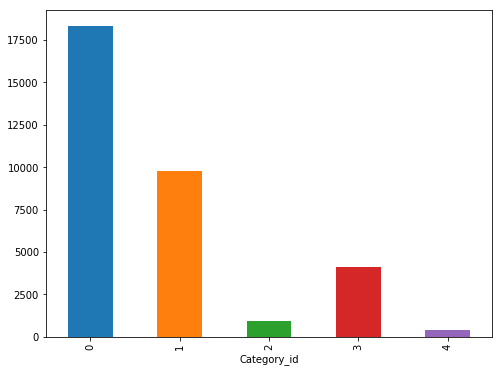

In [253]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
train_temp.groupby('Category_id').Description.count().plot.bar(ylim=0)
plt.show()

In [255]:
## create a new dataframe  to have features of Text and rest variables 
train_temp.shape

(33539, 42)

In [256]:
Text_tfidf_df.shape

(33539, 200)

In [265]:
##Combine both data frames
Features_Union = pd.concat([train_temp, Text_tfidf_df], axis=1)

In [266]:
print(Features_Union.shape)

(33539, 242)


In [268]:
##Need to extract the X and Y to take further for model development
train_temp_X = Features_Union.copy()

In [267]:
type(Features_Union)

pandas.core.frame.DataFrame

In [269]:
print(train_temp_X.head())

   Application/Permit Number  \
0                    6640280   
1                    6452959   
2                    6435127   
3                    6620870   
4                    6363778   

                                         Description   Latitude   Longitude  \
0  alterations to single family residence portion...  47.636732 -122.319828   
1  change use permit from restaurant to residenti...  47.518298 -122.355555   
2  construct interior alterations to existing off...  47.624025 -122.337567   
3  need to remove a fire escape that is not part ...  47.595020 -122.328530   
4  channel modification to thornton creek stream ...  47.705686 -122.320134   

                 Category   Wait Time  Wait_final  Wait_expire  Permit Type_0  \
0  SINGLE FAMILY / DUPLEX    0.000000  320.976759   546.000000              1   
1              COMMERCIAL   62.000000  641.000000   611.000000              1   
2              COMMERCIAL    0.000000  442.000000   547.000000              1   
3       

In [270]:
print(train_temp_X.dtypes)

Application/Permit Number      int64
Description                   object
Latitude                     float64
Longitude                    float64
Category                      object
Wait Time                    float64
Wait_final                   float64
Wait_expire                  float64
Permit Type_0                  uint8
Permit Type_1                  uint8
Permit Type_2                  uint8
Action Type_0                  uint8
Action Type_1                  uint8
Action Type_2                  uint8
Action Type_3                  uint8
Action Type_4                  uint8
Action Type_5                  uint8
Action Type_6                  uint8
Action Type_7                  uint8
Action Type_8                  uint8
Action Type_9                  uint8
Action Type_10                 uint8
Action Type_11                 uint8
Action Type_12                 uint8
Action Type_13                 uint8
Action Type_14                 uint8
Action Type_15                 uint8
S

In [271]:
train_temp_X.drop(['Description','Category', 'Category_id','Application/Permit Number'],axis=1,inplace=True)

In [272]:
train_temp_Y = train_temp.Category_id

In [274]:
print(train_temp_Y.head(10))

0    0
1    1
2    1
3    1
4    1
5    1
6    2
7    1
8    0
9    0
Name: Category_id, dtype: int64


In [293]:
###model development Random Forest to start with

X = train_temp_X
y = train_temp_Y
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support as score

target_names = ['0', '1', '2', '3', '4']
rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5,random_state=None, shuffle=False)
sm = SMOTE()
##accs = []
##f1s = []
##cms = []
for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
       
    # Oversample
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    
    # Fit Naive Bayes on the vectorized X with y train labels, 
    # then predict new y labels using X test
    rf.fit(X_train_res, y_train_res)
    y_pred = rf.predict(X_test)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs =accuracy_score(y_test, y_pred)
    print("Overall Accuracy")
    print(accs)
      
    print("F1 score per class details")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    #print(calculate_f1_score(y_test, y_pred, target_class='0'))
    #print(f1_score(y_test, y_pred, average="macro"))
    #print(precision_score(y_test, y_pred, average="macro"))
    #print(recall_score(y_test, y_pred, average="macro"))  
    ##precision, recall, fscore, support = score(y_test, y_pred)

    ##print('precision: {}'.format(precision))
    ##print('recall: {}'.format(recall))
    ##print('fscore: {}'.format(fscore))
    ##print('support: {}'.format(support))
    #cms.append(confusion_matrix(y_test, y_pred))
    



Overall Accuracy
0.8451795559529132
F1 score per class details
             precision    recall  f1-score   support

          0       0.92      0.92      0.92      3669
          1       0.84      0.84      0.84      1956
          2       0.41      0.32      0.36       186
          3       0.66      0.69      0.68       821
          4       0.32      0.24      0.28        79

avg / total       0.84      0.85      0.84      6711

Overall Accuracy
0.8424504397078552
F1 score per class details
             precision    recall  f1-score   support

          0       0.91      0.93      0.92      3669
          1       0.83      0.84      0.83      1956
          2       0.40      0.31      0.35       185
          3       0.69      0.65      0.67       821
          4       0.28      0.23      0.25        78

avg / total       0.84      0.84      0.84      6709

Overall Accuracy
0.8438944386461905
F1 score per class details
             precision    recall  f1-score   support

         

In [295]:
###Truying with GBoost
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(learning_rate=0.01, n_estimators=25,max_depth=9, subsample=0.8, random_state=10)
for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
       
    # Oversample
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    
    # Fit Naive Bayes on the vectorized X with y train labels, 
    # then predict new y labels using X test
    gbc.fit(X_train_res, y_train_res)
    y_pred = gbc.predict(X_test)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs =accuracy_score(y_test, y_pred)
    print("Overall Accuracy")
    print(accs)
      
    print("F1 score per class details")
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    #print(calculate_f1_score(y_test, y_pred, target_class='0'))
    #print(f1_score(y_test, y_pred, average="macro"))
    #print(precision_score(y_test, y_pred, average="macro"))
    #print(recall_score(y_test, y_pred, average="macro"))  
    ##precision, recall, fscore, support = score(y_test, y_pred)

    ##print('precision: {}'.format(precision))
    ##print('recall: {}'.format(recall))
    ##print('fscore: {}'.format(fscore))
    ##print('support: {}'.format(support))
    #cms.append(confusion_matrix(y_test, y_pred))
    


Overall Accuracy
0.7963045745790494
F1 score per class details
             precision    recall  f1-score   support

          0       0.94      0.87      0.91      3669
          1       0.86      0.72      0.78      1956
          2       0.21      0.60      0.31       186
          3       0.66      0.69      0.68       821
          4       0.21      0.78      0.33        79

avg / total       0.85      0.80      0.82      6711

Overall Accuracy
0.7890892830526159
F1 score per class details
             precision    recall  f1-score   support

          0       0.93      0.87      0.90      3669
          1       0.83      0.72      0.77      1956
          2       0.22      0.58      0.32       185
          3       0.65      0.67      0.66       821
          4       0.17      0.59      0.26        78

avg / total       0.84      0.79      0.81      6709

Overall Accuracy
0.7839570597882809
F1 score per class details
             precision    recall  f1-score   support

         

In [298]:
##Random forest has performed better than XGBoost atleast without any hypertuning.Trying hypertuning with Random forest
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [50, 100, 250],
    'n_estimators': [100, 200, 300, 1000]
}

rf1 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X,y)
grid_search_rf.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 75.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 101.6min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'n_estimators': 200}

In [299]:
###Using the parameters to check how the model would perform
rfb = RandomForestClassifier(bootstrap = True, max_depth = 110,max_features = 'sqrt', min_samples_leaf = 50, n_estimators = 200)
skf = StratifiedKFold(n_splits=5,random_state=None, shuffle=False)
##sm = SMOTE()
##accs = []
##f1s = []
##cms = []
for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
       
    # Oversample
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    
    # Fit Naive Bayes on the vectorized X with y train labels, 
    # then predict new y labels using X test
    rfb.fit(X_train_res, y_train_res)
    y_pred = rfb.predict(X_test)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs =accuracy_score(y_test, y_pred)
    print("Overall Accuracy")
    print(accs)
      
    print("F1 score per class details")
    print(classification_report(y_test, y_pred, target_names=target_names))

Overall Accuracy
0.7976456563850395
F1 score per class details
             precision    recall  f1-score   support

          0       0.94      0.87      0.90      3669
          1       0.88      0.72      0.79      1956
          2       0.25      0.56      0.35       186
          3       0.59      0.76      0.66       821
          4       0.17      0.56      0.26        79

avg / total       0.85      0.80      0.82      6711

Overall Accuracy
0.7934118348487107
F1 score per class details
             precision    recall  f1-score   support

          0       0.94      0.87      0.90      3669
          1       0.88      0.71      0.79      1956
          2       0.24      0.52      0.32       185
          3       0.58      0.74      0.65       821
          4       0.14      0.50      0.22        78

avg / total       0.85      0.79      0.81      6709

Overall Accuracy
0.792455643357686
F1 score per class details
             precision    recall  f1-score   support

          

In [380]:
##overall metrics in first model has proven to be better than the other models. Going with the initial model for predictions
##checking the Test data 
test.head()


,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location
0,6425384,Construction,8348 18TH AVE NW,"Construct 6' retaining wall to create walkway,...",ADD/ALT,No plan review,"JOSSART, STEVE",2014-07-02T00:00:00,2014-07-02T00:00:00,2015-06-29T00:00:00,2016-01-02T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.690123,-122.379795,"{'latitude': '47.69012273', 'human_address': '..."
1,6496502,Construction,3120 S FRONTENAC ST,Like for like repair of framing at porches of ...,ADD/ALT,No plan review,"RUNDLE, DANIEL",2015-11-12T00:00:00,2015-11-12T00:00:00,2016-02-10T00:00:00,2017-05-12T00:00:00,Permit Closed,SCHULTIS SUNDBERG INC.,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.540111,-122.290535,"{'latitude': '47.54011095', 'human_address': '..."
2,6622347,Demolition,4031 S WILLOW ST,Demolish existing single family dwelling. Subj...,DEMOLITION,No plan review,"WEBER, JULIAN",2017-10-04T00:00:00,NaN,NaN,NaN,Reviews Completed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,3024280.0,47.540470,-122.281410,"{'latitude': '47.54046991', 'human_address': '..."
3,6565685,Construction,3940 1ST AVE NE,Establish use as rowhouse and construct new du...,NEW,Plan Review,"NOVION, SHAUN",2017-02-14T00:00:00,2017-10-20T00:00:00,NaN,2019-04-20T00:00:00,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,3025762.0,47.654986,-122.327467,"{'latitude': '47.65498619', 'human_address': '..."
4,6487370,Construction,5317 BALLARD AVE NW,Tenant improvement to existing women's boutiqu...,ADD/ALT,No plan review,DYNA CONTRACTING INC,2017-07-19T00:00:00,2017-07-19T00:00:00,2018-01-17T00:00:00,2019-01-19T00:00:00,Permit Closed,DYNA CONTRACTING INC,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.666714,-122.383900,"{'latitude': '47.66671437', 'human_address': '..."


In [381]:
##Taking a copy of the test data
test_temp = test.copy()

In [382]:
test_temp.head()

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,Expiration Date,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location
0,6425384,Construction,8348 18TH AVE NW,"Construct 6' retaining wall to create walkway,...",ADD/ALT,No plan review,"JOSSART, STEVE",2014-07-02T00:00:00,2014-07-02T00:00:00,2015-06-29T00:00:00,2016-01-02T00:00:00,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.690123,-122.379795,"{'latitude': '47.69012273', 'human_address': '..."
1,6496502,Construction,3120 S FRONTENAC ST,Like for like repair of framing at porches of ...,ADD/ALT,No plan review,"RUNDLE, DANIEL",2015-11-12T00:00:00,2015-11-12T00:00:00,2016-02-10T00:00:00,2017-05-12T00:00:00,Permit Closed,SCHULTIS SUNDBERG INC.,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.540111,-122.290535,"{'latitude': '47.54011095', 'human_address': '..."
2,6622347,Demolition,4031 S WILLOW ST,Demolish existing single family dwelling. Subj...,DEMOLITION,No plan review,"WEBER, JULIAN",2017-10-04T00:00:00,NaN,NaN,NaN,Reviews Completed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,3024280.0,47.540470,-122.281410,"{'latitude': '47.54046991', 'human_address': '..."
3,6565685,Construction,3940 1ST AVE NE,Establish use as rowhouse and construct new du...,NEW,Plan Review,"NOVION, SHAUN",2017-02-14T00:00:00,2017-10-20T00:00:00,NaN,2019-04-20T00:00:00,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,3025762.0,47.654986,-122.327467,"{'latitude': '47.65498619', 'human_address': '..."
4,6487370,Construction,5317 BALLARD AVE NW,Tenant improvement to existing women's boutiqu...,ADD/ALT,No plan review,DYNA CONTRACTING INC,2017-07-19T00:00:00,2017-07-19T00:00:00,2018-01-17T00:00:00,2019-01-19T00:00:00,Permit Closed,DYNA CONTRACTING INC,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.666714,-122.383900,"{'latitude': '47.66671437', 'human_address': '..."


In [383]:
##Run the data through transformation and cleaning pipeline before predictions
from datetime import datetime
from dateutil.parser import parse
test_temp['Wait Time'] = pd.to_datetime(test_temp['Issue Date']) - pd.to_datetime(test_temp['Application Date'])
test_temp['Wait_final'] = pd.to_datetime(test_temp['Final Date']) - pd.to_datetime(test_temp['Application Date'])
test_temp['Wait_expire'] = pd.to_datetime(test_temp['Expiration Date']) - pd.to_datetime(test_temp['Application Date'])

In [384]:
test_temp.head()

,Application/Permit Number,Permit Type,Address,Description,Action Type,Work Type,Applicant Name,Application Date,Issue Date,Final Date,...,Status,Contractor,Permit and Complaint Status URL,Master Use Permit,Latitude,Longitude,Location,Wait Time,Wait_final,Wait_expire
0,6425384,Construction,8348 18TH AVE NW,"Construct 6' retaining wall to create walkway,...",ADD/ALT,No plan review,"JOSSART, STEVE",2014-07-02T00:00:00,2014-07-02T00:00:00,2015-06-29T00:00:00,...,Permit Closed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.690123,-122.379795,"{'latitude': '47.69012273', 'human_address': '...",0 days,362 days,549 days
1,6496502,Construction,3120 S FRONTENAC ST,Like for like repair of framing at porches of ...,ADD/ALT,No plan review,"RUNDLE, DANIEL",2015-11-12T00:00:00,2015-11-12T00:00:00,2016-02-10T00:00:00,...,Permit Closed,SCHULTIS SUNDBERG INC.,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.540111,-122.290535,"{'latitude': '47.54011095', 'human_address': '...",0 days,90 days,547 days
2,6622347,Demolition,4031 S WILLOW ST,Demolish existing single family dwelling. Subj...,DEMOLITION,No plan review,"WEBER, JULIAN",2017-10-04T00:00:00,NaN,NaN,...,Reviews Completed,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,3024280.0,47.540470,-122.281410,"{'latitude': '47.54046991', 'human_address': '...",NaT,NaT,NaT
3,6565685,Construction,3940 1ST AVE NE,Establish use as rowhouse and construct new du...,NEW,Plan Review,"NOVION, SHAUN",2017-02-14T00:00:00,2017-10-20T00:00:00,NaN,...,Permit Issued,NaN,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,3025762.0,47.654986,-122.327467,"{'latitude': '47.65498619', 'human_address': '...",248 days,NaT,795 days
4,6487370,Construction,5317 BALLARD AVE NW,Tenant improvement to existing women's boutiqu...,ADD/ALT,No plan review,DYNA CONTRACTING INC,2017-07-19T00:00:00,2017-07-19T00:00:00,2018-01-17T00:00:00,...,Permit Closed,DYNA CONTRACTING INC,{'url': 'http://web6.seattle.gov/dpd/PermitSta...,NaN,47.666714,-122.383900,"{'latitude': '47.66671437', 'human_address': '...",0 days,182 days,549 days


In [385]:
test_temp.drop(['Address','Applicant Name','Application Date','Final Date', 'Expiration Date', 'Contractor', 'Permit and Complaint Status URL','Master Use Permit','Location'],axis=1,inplace=True)
print(test_temp.head())

   Application/Permit Number   Permit Type  \
0                    6425384  Construction   
1                    6496502  Construction   
2                    6622347    Demolition   
3                    6565685  Construction   
4                    6487370  Construction   

                                         Description Action Type  \
0  Construct 6' retaining wall to create walkway,...     ADD/ALT   
1  Like for like repair of framing at porches of ...     ADD/ALT   
2  Demolish existing single family dwelling. Subj...  DEMOLITION   
3  Establish use as rowhouse and construct new du...         NEW   
4  Tenant improvement to existing women's boutiqu...     ADD/ALT   

        Work Type           Issue Date             Status   Latitude  \
0  No plan review  2014-07-02T00:00:00      Permit Closed  47.690123   
1  No plan review  2015-11-12T00:00:00      Permit Closed  47.540111   
2  No plan review                  NaN  Reviews Completed  47.540470   
3     Plan Review  2017-10

In [386]:
test_temp.drop(['Issue Date'],axis=1,inplace=True)

In [387]:
test_temp['Wait Time'] = test_temp['Wait Time'].dt.days
test_temp['Wait_final'] = test_temp['Wait_final'].dt.days
test_temp['Wait_expire'] = test_temp['Wait_expire'].dt.days
Wait_Time_mean_test = test_temp.groupby('Permit Type')['Wait Time'].mean()
for index, row in test_temp.iterrows():
    if(pd.isnull(row['Wait Time'])):
        test_temp.loc[index, 'Wait Time'] = Wait_Time_mean_test[row['Permit Type']]
        
Wait_Time_final_test = test_temp.groupby('Permit Type')['Wait_final'].mean()
for index, row in test_temp.iterrows():
    if(pd.isnull(row['Wait_final'])):
        test_temp.loc[index, 'Wait_final'] = Wait_Time_final_test[row['Permit Type']]
Wait_Time_expire_test = test_temp.groupby('Permit Type')['Wait_expire'].mean()
for index, row in test_temp.iterrows():
    if(pd.isnull(row['Wait_expire'])):
        test_temp.loc[index, 'Wait_expire'] = Wait_Time_expire_test[row['Permit Type']]

In [388]:
test_temp.dtypes

Application/Permit Number      int64
Permit Type                   object
Description                   object
Action Type                   object
Work Type                     object
Status                        object
Latitude                     float64
Longitude                    float64
Wait Time                    float64
Wait_final                   float64
Wait_expire                  float64
dtype: object

In [389]:
##Data cleaning of Description of test data
import re
def process_data_test(input):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", "",str(input).lower()).split())
test_temp['Description'] = test_temp['Description'].apply(process_data_test)
print(test_temp['Description'].head())

0    construct 6 retaining wall to create walkway p...
1    like for like repair of framing at porches of ...
2    demolish existing single family dwelling subje...
3    establish use as rowhouse and construct new du...
4    tenant improvement to existing womens boutique...
Name: Description, dtype: object


In [390]:
##Convert Description to vector rep
dtm_tfidf_test = vect_tfidf.transform(test_temp['Description'])
print(dtm_tfidf_test.shape)

(22360, 200)


In [391]:
##Storing the details into Dataframe 
Text_tfidf_test_df = pd.DataFrame(dtm_tfidf_test.toarray(), columns=vect_tfidf.get_feature_names())

In [392]:
Text_tfidf_test_df.head()

,2nd,accessory,accessory dwelling,accessory to,add,addition,addition and,addition to,additions,alteration,...,use and,use as,use from,voluntary,wall,west,with,with attached,with surface,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.478064,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.215282,0.0,0.0,0.000000,0.0,0.196308,0.0,0.331193,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [393]:
test_temp= pd.get_dummies(test_temp, columns=['Permit Type','Action Type','Status','Work Type'])

In [394]:
Features_Union_test = pd.concat([test_temp, Text_tfidf_test_df], axis=1)

In [395]:
test_temp_X = Features_Union_test.copy()

In [396]:
test_temp_X.drop(['Description'],axis=1,inplace=True)

In [397]:
X_test = test_temp_X
X_test.apply(lambda x: sum(x.isnull()))

Application/Permit Number                     0
Latitude                                     16
Longitude                                    16
Wait Time                                     0
Wait_final                                    0
Wait_expire                                   0
Permit Type_Construction                      0
Permit Type_Demolition                        0
Permit Type_Site Development                  0
Action Type_ADD/ALT                           0
Action Type_ALTER                             0
Action Type_CURB CUT                          0
Action Type_DECONSTRUCTION                    0
Action Type_DEMOLITION                        0
Action Type_DRAINAGE APPROVAL                 0
Action Type_GRADING                           0
Action Type_NEW                               0
Action Type_NO CONSTRUCTION                   0
Action Type_RELOCATION                        0
Action Type_SHORELINE EXEMPTION ONLY          0
Action Type_SITE MONITORING ONLY        

In [398]:
X_test['Latitude'].fillna(0,inplace=True)
X_test['Longitude'].fillna(0,inplace=True)


In [341]:
X_test['predictions'] = rf.predict(X_test)

In [343]:
print(X_test['predictions'].head())

0    0
1    0
2    0
3    0
4    1
Name: predictions, dtype: int64


In [350]:
print(id_to_category)

{0: 'SINGLE FAMILY / DUPLEX', 1: 'COMMERCIAL', 2: 'INSTITUTIONAL', 3: 'MULTIFAMILY', 4: 'INDUSTRIAL'}


In [351]:
print(type(id_to_category))

<class 'dict'>


In [369]:
X_test.to_csv("D:/Certi/Intvw/zs/output_rf.csv")


    

In [371]:
###Trying with Ensembling models 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

models = [
    SGDClassifier(),
    LinearSVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier()
]

m_names = [m.__class__.__name__ for m in models]

models = list(zip(m_names, models))
vc = VotingClassifier(estimators=models)

sm = SMOTE()

for train_index, test_index in skf.split(X,y):
   
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
       
    # Oversample
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    
    # Fit Naive Bayes on the vectorized X with y train labels, 
    # then predict new y labels using X test
    vc.fit(X_train_res, y_train_res)
    y_pred = vc.predict(X_test)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs =accuracy_score(y_test, y_pred)
    print("Overall Accuracy")
    print(accs)
      
    print("F1 score per class details")
    print(classification_report(y_test, y_pred, target_names=target_names))


C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Overall Accuracy
0.8292355833705856
F1 score per class details
             precision    recall  f1-score   support

          0       0.90      0.93      0.92      3669
          1       0.91      0.74      0.81      1956
          2       0.40      0.42      0.41       186
          3       0.65      0.70      0.68       821
          4       0.20      0.63      0.30        79

avg / total       0.85      0.83      0.84      6711



C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Overall Accuracy
0.7647935608883589
F1 score per class details
             precision    recall  f1-score   support

          0       0.95      0.87      0.91      3669
          1       0.90      0.66      0.76      1956
          2       0.12      0.81      0.21       185
          3       0.72      0.61      0.66       821
          4       0.38      0.13      0.19        78

avg / total       0.88      0.76      0.81      6709



C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Overall Accuracy
0.8525421201729536
F1 score per class details
             precision    recall  f1-score   support

          0       0.92      0.93      0.93      3668
          1       0.82      0.86      0.84      1956
          2       0.48      0.29      0.36       185
          3       0.70      0.66      0.68       820
          4       0.30      0.22      0.25        78

avg / total       0.85      0.85      0.85      6707



C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Overall Accuracy
0.7904861318222487
F1 score per class details
             precision    recall  f1-score   support

          0       0.95      0.91      0.93      3668
          1       0.90      0.68      0.78      1955
          2       0.14      0.79      0.24       185
          3       0.77      0.57      0.66       820
          4       0.41      0.19      0.26        78

avg / total       0.88      0.79      0.82      6706



C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Overall Accuracy
0.835222189084402
F1 score per class details
             precision    recall  f1-score   support

          0       0.95      0.89      0.92      3668
          1       0.83      0.85      0.84      1955
          2       0.28      0.54      0.36       185
          3       0.66      0.69      0.67       820
          4       0.38      0.19      0.25        78

avg / total       0.85      0.84      0.84      6706



C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [399]:
X_test['predictions_en'] = vc.predict(X_test)

C:\Users\anshuman_mahapatra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [400]:
X_test.head()

,Application/Permit Number,Latitude,Longitude,Wait Time,Wait_final,Wait_expire,Permit Type_Construction,Permit Type_Demolition,Permit Type_Site Development,Action Type_ADD/ALT,...,use as,use from,voluntary,wall,west,with,with attached,with surface,work,predictions_en
0,6425384,47.690123,-122.379795,0.000000,362.000000,549.000000,1,0,0,1,...,0.000000,0.0,0.0,0.478064,0.0,0.000000,0.0,0.000000,0.0,0
1,6496502,47.540111,-122.290535,0.000000,90.000000,547.000000,1,0,0,1,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
2,6622347,47.540470,-122.281410,131.136827,386.947945,693.167878,0,1,0,0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
3,6565685,47.654986,-122.327467,248.000000,317.653385,795.000000,1,0,0,0,...,0.215282,0.0,0.0,0.000000,0.0,0.196308,0.0,0.331193,0.0,0
4,6487370,47.666714,-122.383900,0.000000,182.000000,549.000000,1,0,0,1,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1


In [401]:
X_test.to_csv("D:/Certi/Intvw/zs/output_ensemble.csv")